In [1]:
%run parse_mails3.py

df = parse_maildir3("../data/maildir")

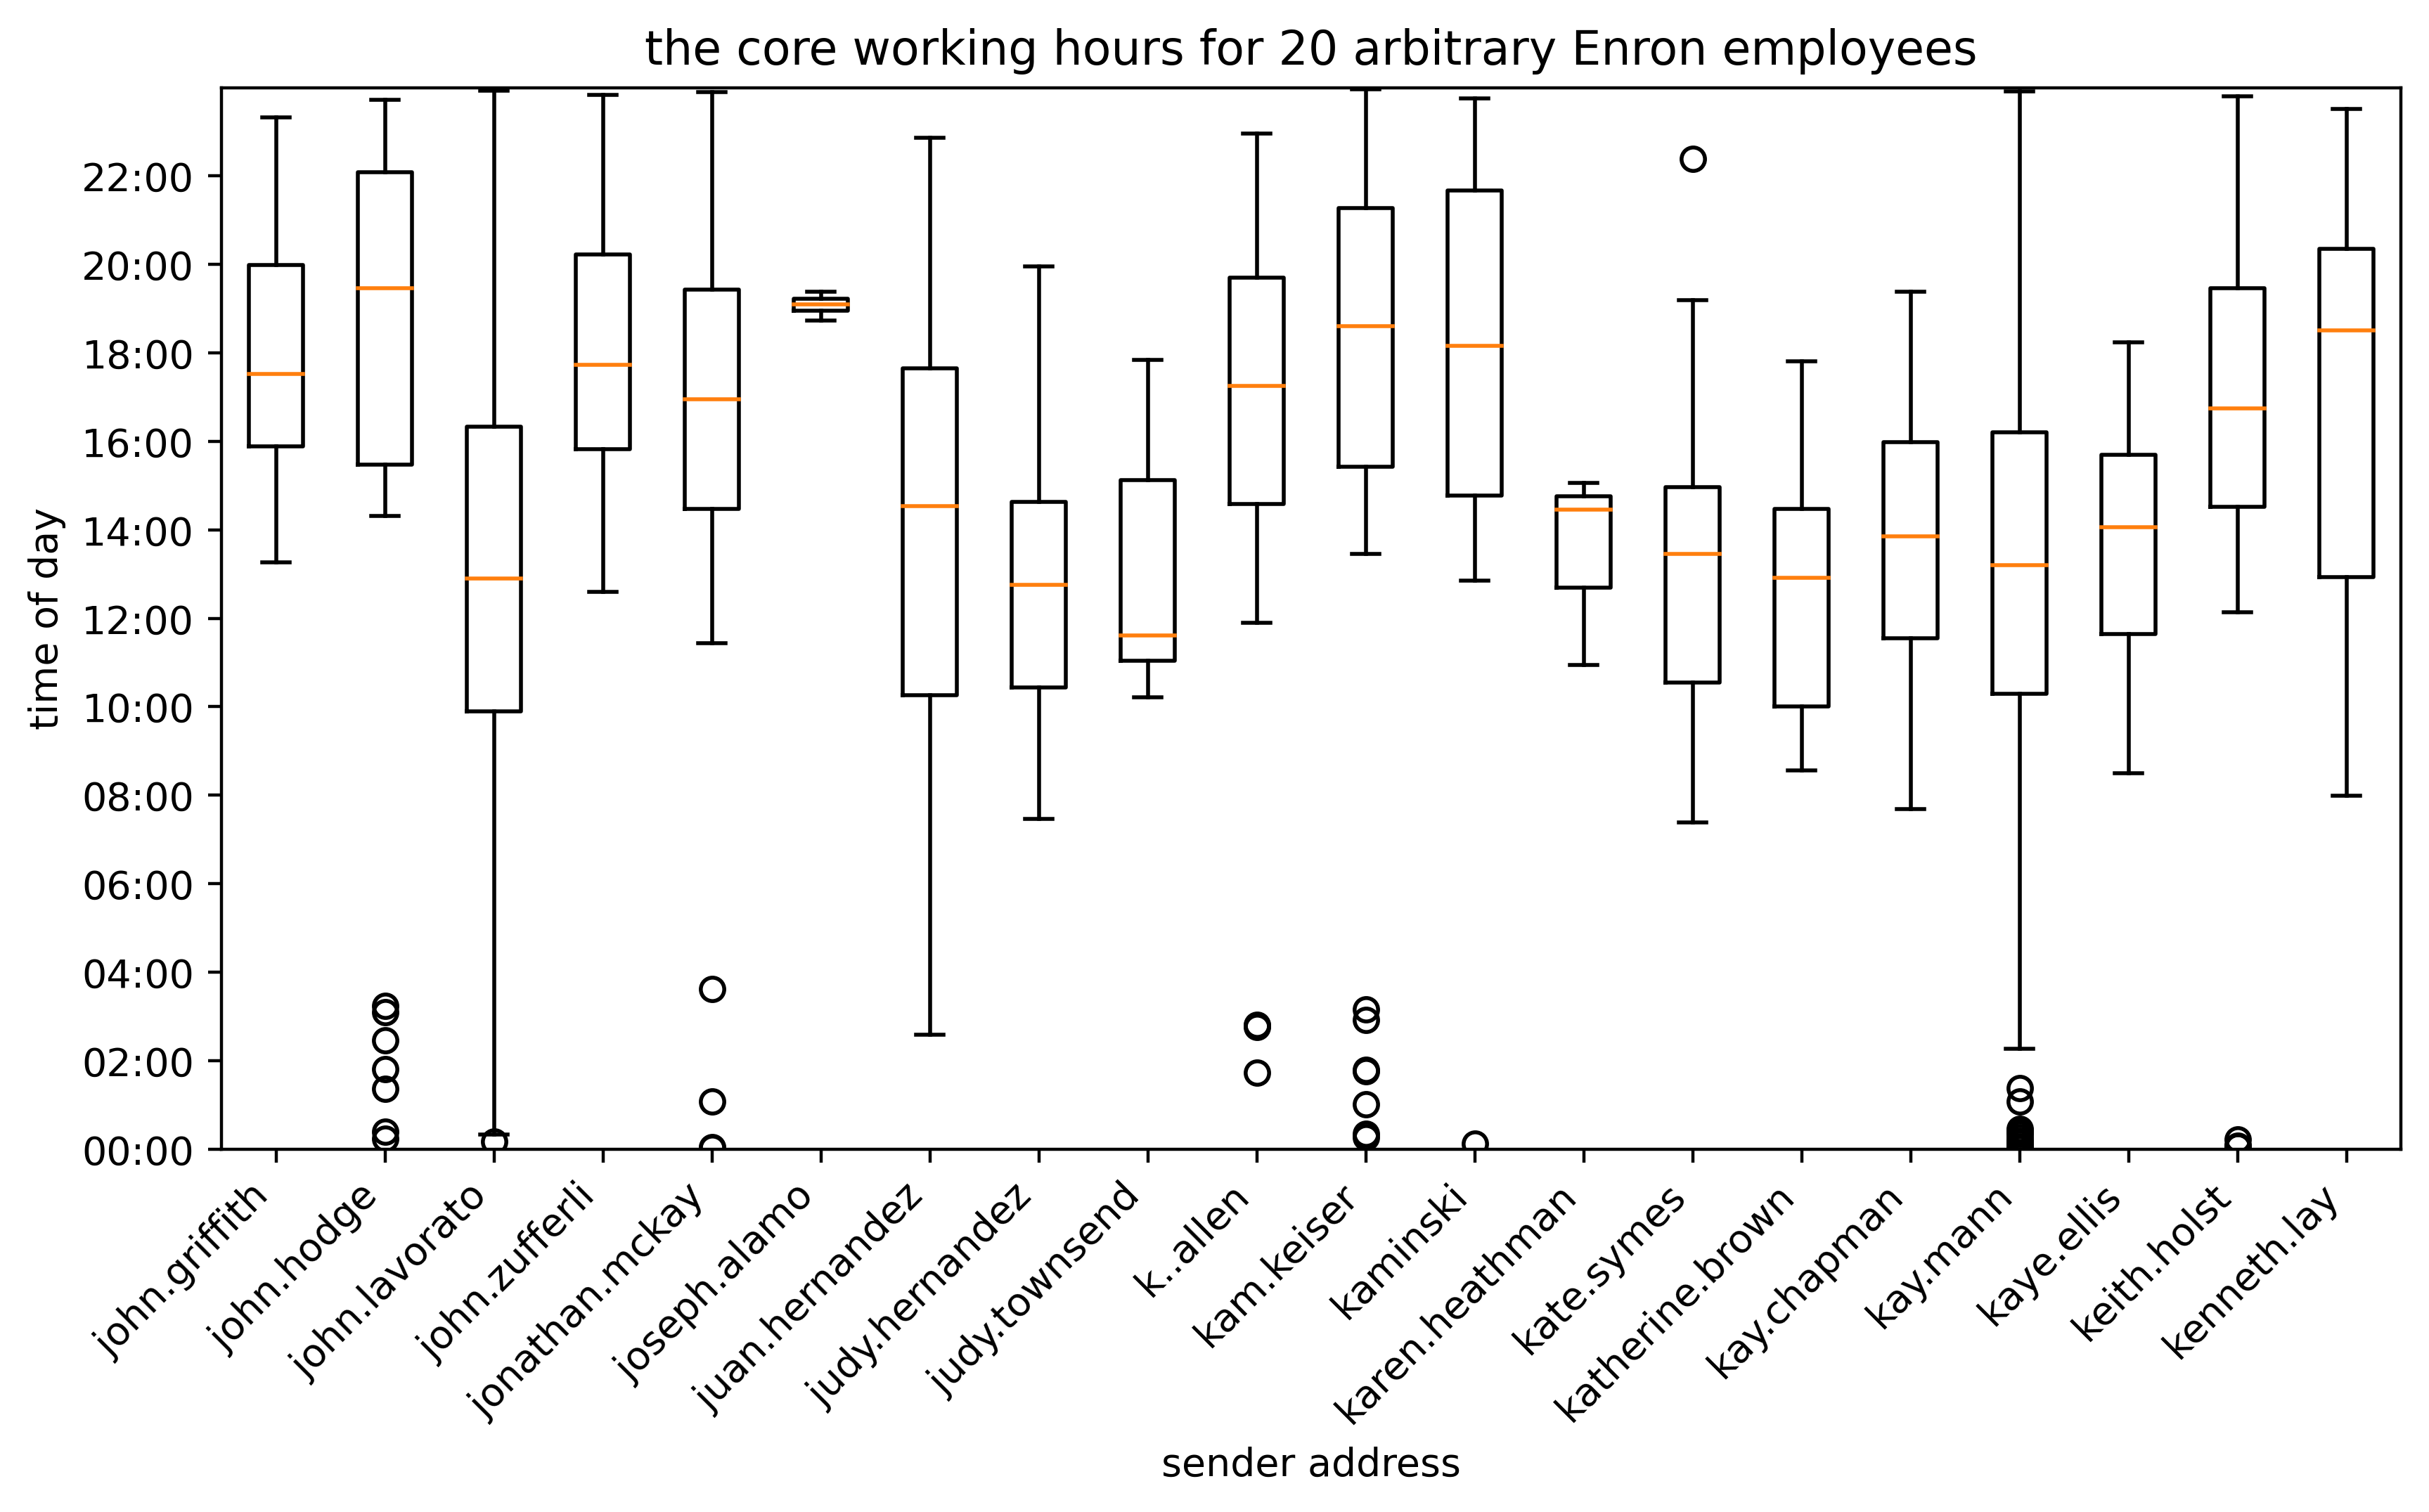

In [32]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
from tueplots import bundles
import datetime as dt

def seconds_in_time(x, pos):
    hours = x // 3600
    minutes = (x - (hours * 3600)) // 60
    return '%s:%s' % (str(hours).zfill(2), str(minutes).zfill(2))

time_formatter = FuncFormatter(seconds_in_time)

grouped_times = df.groupby("from")["seconds_since_midnight"].apply(list).reset_index()
times = grouped_times["seconds_since_midnight"].to_numpy()
names = grouped_times["from"].to_numpy()

fig, axs = plt.subplots(1, 1, figsize=(10, 5), dpi=400)
m = 110
n = 130
axs.boxplot(times[m:n], labels=list(map(lambda x: x[:-10], names[m:n])))
axs.set_ylabel("time of day")
axs.set_xlabel("sender address")
axs.set_title("the core working hours for 20 arbitrary Enron employees")
axs.set_yticks([i * 7200 for i in range(12)])
axs.set_ylim(0, 60*60*24)
axs.yaxis.set_major_formatter(time_formatter)
plt.xticks(rotation=45, ha="right")
fig.savefig("fig003_mails_boxplott.pdf", bbox_inches="tight")
plt.show()